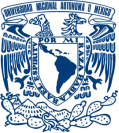
Universidad Nacional Autónoma de México
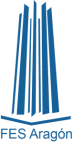

                 Facultad de Estudios Superiores Aragón 

                 Métodos Numéricos

                 Ingeniería Industrial 

                 Integrantes:

                 -Gonzalez Ruiz Yohana Itzel

                 -Luna Perez Carlos Yaret

                 -Martínez Martínez Alejandro

                 -Soto Mateos Juliana Paola

                 -Grupo: 2404 

                 Profesor: Nelly Rigaud Tellez

                 Fecha de entrega: 22/04/2025

                 Método Factorización LU


El método de factorización LU es eficaz cuando se tienen muchas incógnitas, consiste en descomponer una matriz en el producto de una matriz L (inferior) y una U (superior). Esto ayuda a encontrar soluciones de forma más eficiente. En esta ocasión de implementará la factorización LU usando Python, con el apoyo de librerías como NumPy. Además, se presenta un ejemplo práctico para mostrar paso a paso cómo se llega a la solución del sistema utilizando este método.

Sistema de ecuaciones que se resuelve:

2x1 − x2 − 2x3 = −2

−4x1 + 6x2 + 3x3 = 9

−4x1 − 2x2 + 8x3 = −5

Se resuelve un sistema de ecuaciones lineales de la forma Ax = b 
Usando la descomposición LU, que consiste en descomponer la matriz A en dos matrices
L: una matriz triangular inferior
U: una matriz triangular superior
Luego se resuelven dos sistemas auxiliares:
Ly = “b” usando sustitución hacia adelante
Ux = “y” usando sustitución hacia atrás

PROCEDIMIENTO PARA RESOLVER EN PYTHON
1. Importar la librería NumPy (para trabajar con matrices y operaciones numéricas)
2. Definir la función lu_decomposition(A):
    a. Crear matrices L y U del mismo tamaño que A, inicializadas en ceros
    b. Para cada fila i de la matriz A:
        i. Calcular los elementos de la fila i de la matriz U
        ii. Calcular los elementos de la columna i de la matriz L
        iii. Asegurarse de que la diagonal de L tenga 1
    c. Devolver las matrices L y U
3. Definir la función forward_substitution(L, b):
    a. Crear un vector y inicializado en ceros
    b. Para cada fila i:
        i. Calcular y[i] usando los valores anteriores de y y los valores de L
    c. Devolver el vector y
4. Definir la función backward_substitution(U, y):
    a. Crear un vector x inicializado en ceros
    b. Para cada fila i desde la última hacia la primera:
        i. Calcular x[i] usando los valores anteriores de x y los valores de U
    c. Devolver el vector x
5. En el programa principal:
    a. Definir la matriz A y el vector b del sistema
    b. Aplicar lu_decomposition(A) → obtener L y U
    c. Aplicar forward_substitution(L, b) → obtener y
    d. Aplicar backward_substitution(U, y) → obtener x
    e. Imprimir matrices L y U, y el resultado x

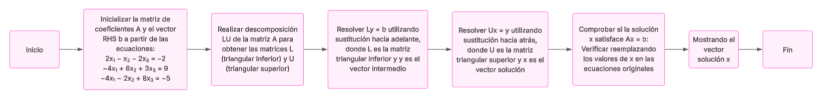

ENLACE A DIAGRAMA EN LUCIDCHART: 

https://lucid.app/lucidchart/a2dd8b2a-f18a-4ae8-966f-adcc6707e5c9/edit?viewport_loc=-850%2C1586%2C3758%2C1626%2C0_0&invitationId=inv_e148af11-a8a2-4521-b939-40f2791459f4

CODIGO PYTHON

In [ ]:
import numpy as np

# Función para descomponer la matriz A en L y U
def lu_decomposition(A):
    n = len(A)  # Número de filas/columnas
    L = np.zeros((n, n))  # Matriz L inicializada en ceros
    U = np.zeros((n, n))  # Matriz U inicializada en ceros

    # Iterar sobre cada fila para construir L y U
    for i in range(n):
        # Construyendo la matriz U
        for k in range(i, n):
            # Sumar los productos L[i][j] * U[j][k] para j < i
            sum_ = sum(L[i][j] * U[j][k] for j in range(i))
            U[i][k] = A[i][k] - sum_  # Restar la suma a A[i][k] para obtener U[i][k]

        # Construyendo la matriz L
        for k in range(i, n):
            if i == k:
                L[i][i] = 1  # Diagonal de L siempre es 1
            else:
                # Sumar los productos L[k][j] * U[j][i] para j < i
                sum_ = sum(L[k][j] * U[j][i] for j in range(i))
                # Calcular L[k][i] usando la fórmula de factorización LU
                L[k][i] = (A[k][i] - sum_) / U[i][i]

    return L, U

# Sustitución hacia adelante para resolver Ly = b
def forward_substitution(L, b):
    n = len(b)
    y = np.zeros(n)
    for i in range(n):
        # y[i] = b[i] - suma de L[i][j] * y[j] para j < i
        y[i] = b[i] - sum(L[i][j] * y[j] for j in range(i))
    return y

# Sustitución hacia atrás para resolver Ux = y
def backward_substitution(U, y):
    n = len(y)
    x = np.zeros(n)
    for i in reversed(range(n)):
        # x[i] = (y[i] - suma de U[i][j] * x[j] para j > i) / U[i][i]
        x[i] = (y[i] - sum(U[i][j] * x[j] for j in range(i + 1, n))) / U[i][i]
    return x

# Ejemplo

# Definir la matriz A del sistema Ax = b
A = np.array([[2, -1, -2],
              [-4, 6, 3],
              [-4, -2, 8]], dtype=float)

# Vector de resultados b
b = np.array([-2, 9, -5], dtype=float)

# Paso 1: Descomposición LU
L, U = lu_decomposition(A)

# Paso 2: Resolver Ly = b usando sustitución hacia adelante
y = forward_substitution(L, b)

# Paso 3: Resolver Ux = y usando sustitución hacia atrás
x = backward_substitution(U, y)

# Mostrar resultados
print("Matriz L (Lower triangular):\n", L)
print("Matriz U (Upper triangular):\n", U)
print("Solución del sistema x:\n", x)

COMENTARIO FINAL

El método de descomposición LU resulta eficaz para solucionar sistemas de ecuaciones lineales, en particular cuando se requieren soluciones a varios sistemas con la misma matriz de coeficientes pero distintos vectores "b".  Al romper la matriz al desglosar la matriz 
 "A" en dos matrices triangulares (una de nivel inferior (L) y otra de nivel superior (U)), se simplifica el procedimiento de resolución mediante reemplazos sucesivos.

In [ ]:
REFERENCIAS

Navarro, S. (2024). Factorización LU (Lower-Upper). keecoding. Recuperado el 15 del 04 de 2025 de https://keepcoding.io/blog/factorizacion-lu-lower-upper/

ALF. (2022). La librería Numpy. AprendeconAlf. Recuperado el 15 del 04 de 2025 de https://aprendeconalf.es/docencia/python/manual/numpy/

Rodriguez, D. (2021). NumPy: Crear matrices vacías en NumPy y adjuntar filas o columnas. Analytics Lane. Recuperado el 15 del 04 de 2025 de https://www.analyticslane.com/2021/01/11/numpy-crear-matrices-vacias-en-numpy-y-adjuntar-filas-o-columnas/

David. Y. (2023). Raise an exception in Python. SENTRY. Recuperado el 15 del 04 de 2025 de https://sentry.io/answers/raise-an-exception-in-python/